<a href="https://colab.research.google.com/github/sergio2526/prueba_coder_git/blob/analitica/Hiper_parametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerías
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive/CoderHouse/data")

Mounted at /content/gdrive
/content


In [3]:
%ls

accidents.csv  customers.csv       hotels.csv
clase0.xlsx    datos_empresas.csv  orders.csv
clase1.xlsx    employees.csv       Position_Salaries.csv


In [4]:
#Cargamos los datos y los preparamos!
data = pd.read_csv("hotels.csv", sep = ",")

In [5]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Crear un modelo de machine learning resolviendo la inquietud sobre ¿ Cuantas noches se podria quedar una persona en un hotel segun las caracteristicas de cada individuo. ?

In [6]:
#Hacemos una copia del dataset y me quedo con algunas variables
data2 = data[['total_of_special_requests','deposit_type','customer_type', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces','arrival_date_month',
'arrival_date_day_of_month','hotel']].copy()

In [7]:
data2.head()

,total_of_special_requests,deposit_type,customer_type,stays_in_weekend_nights,stays_in_week_nights,required_car_parking_spaces,arrival_date_month,arrival_date_day_of_month,hotel
0,0,No Deposit,Transient,0,0,0,July,1,Resort Hotel
1,0,No Deposit,Transient,0,0,0,July,1,Resort Hotel
2,0,No Deposit,Transient,0,1,0,July,1,Resort Hotel
3,0,No Deposit,Transient,0,1,0,July,1,Resort Hotel
4,1,No Deposit,Transient,0,2,0,July,1,Resort Hotel


Creamos la variable target: 
  
- estancias_en_semana_noches + se queda_en_noches_de_fin_de_semana

In [8]:
#Feature Engineer
data2['total_stay'] = data2['stays_in_week_nights'] + data2['stays_in_weekend_nights']


In [9]:
data2

,total_of_special_requests,deposit_type,customer_type,stays_in_weekend_nights,stays_in_week_nights,required_car_parking_spaces,arrival_date_month,arrival_date_day_of_month,hotel,total_stay
0,0,No Deposit,Transient,0,0,0,July,1,Resort Hotel,0
1,0,No Deposit,Transient,0,0,0,July,1,Resort Hotel,0
2,0,No Deposit,Transient,0,1,0,July,1,Resort Hotel,1
3,0,No Deposit,Transient,0,1,0,July,1,Resort Hotel,1
4,1,No Deposit,Transient,0,2,0,July,1,Resort Hotel,2
...,...,...,...,...,...,...,...,...,...,...
119385,0,No Deposit,Transient,2,5,0,August,30,City Hotel,7
119386,2,No Deposit,Transient,2,5,0,August,31,City Hotel,7
119387,4,No Deposit,Transient,2,5,0,August,31,City Hotel,7
119388,0,No Deposit,Transient,2,5,0,August,31,City Hotel,7


In [10]:
# Eliminamos las var q usamos...
data3 = data2.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)

In [11]:
data3.shape

(119390, 8)

In [12]:
grafico_df=data3[['total_stay','arrival_date_month']].groupby('arrival_date_month').count()
grafico_df

,total_stay
arrival_date_month,
April,11089
August,13877
December,6780
February,8068
January,5929
July,12661
June,10939
March,9794
May,11791


Text(0, 0.5, 'Frecuencia')

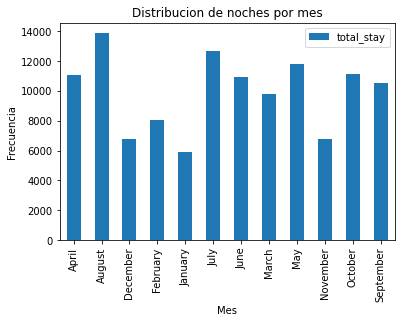

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
grafico_df.plot(kind='bar')
plt.title('Distribucion de noches por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

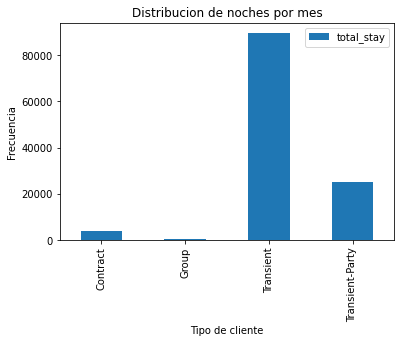

In [14]:
grafico_df=data3[['total_stay','customer_type']].groupby('customer_type').count()
grafico_df
import seaborn as sns
import matplotlib.pyplot as plt
grafico_df.plot(kind='bar')
plt.title('Distribucion de noches por mes')
plt.xlabel('Tipo de cliente')
plt.ylabel('Frecuencia')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25948afd10>,
      dtype=object)

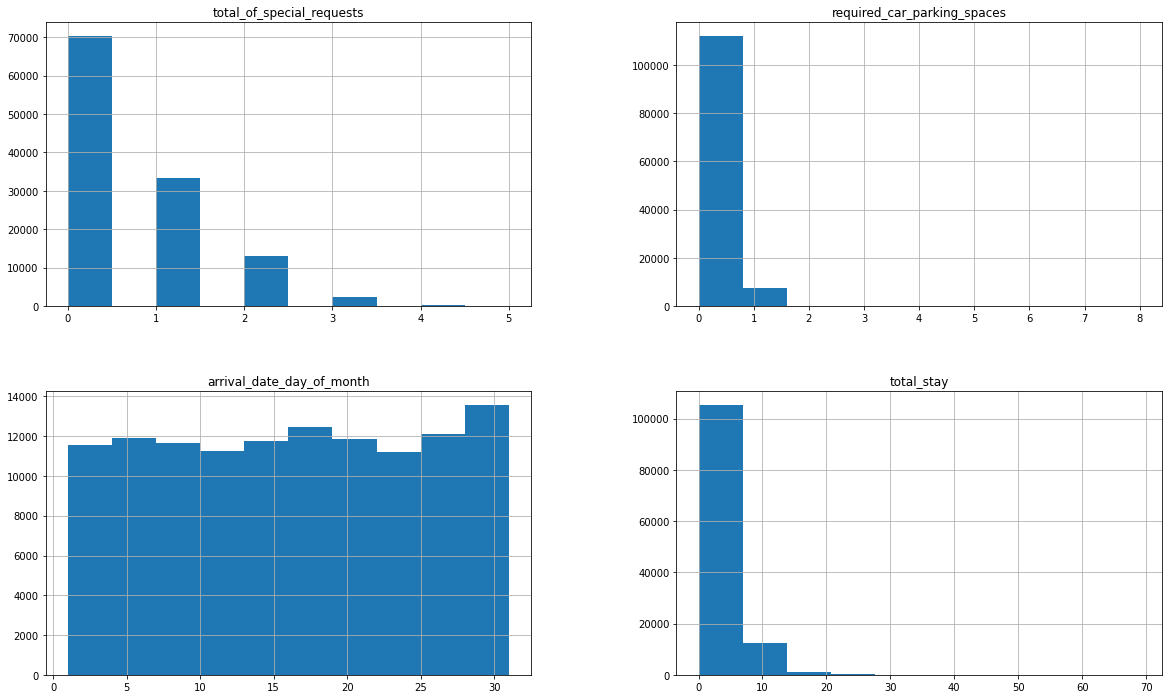

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,12)) #Definimos el tamaño del grafico
data3.hist(ax = fig.gca()) #Realizamos el histograma de las variables

In [16]:
data3.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [17]:
data3.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [18]:
#Hacemos dummies las variables!
data4=pd.get_dummies(data3, drop_first=False)
data4

,total_of_special_requests,required_car_parking_spaces,arrival_date_day_of_month,total_stay,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,...,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,hotel_City Hotel,hotel_Resort Hotel
0,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,1,0,1,2,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,30,7,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
119386,2,0,31,7,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
119387,4,0,31,7,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
119388,0,0,31,7,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [19]:
#Separamos los datos de entrada de los de salida
X_data=data4.drop('total_stay', axis=1)
y_data=data4['total_stay']

In [20]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

random_forest = RandomForestRegressor() #Instanciamos el modelo
random_forest

RandomForestRegressor()

In [25]:
#Definimos los parámetros de búsqueda
"""
params = {
    'n_estimators': [100,200],
    'criterion': ["squared_error","mse"]
}
"""

params = {
    'n_estimators' : [50,100,200],
    'max_features': [2,4,5],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[4,5]
}


grid_random_forest = GridSearchCV(estimator=random_forest,
                                  param_grid=params,
                                  cv=2,
                                  scoring="neg_mean_absolute_error",
                                  verbose=1,
                                  n_jobs = -1)

In [26]:
%%time
#Entrenamos el modelo (Se demora bastante!!!!!!)
grid_random_forest.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


CPU times: user 14.5 s, sys: 185 ms, total: 14.7 s
Wall time: 1min 33s


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse'],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error', verbose=1)

In [27]:
#Obtenemos el mejor modelo!
grid_random_forest.best_estimator_

RandomForestRegressor(criterion='mse')

In [28]:
grid_random_forest.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [29]:
random_forest_nuevo = RandomForestRegressor(criterion= 'mse', n_estimators= 100)
random_forest_nuevo.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse')

In [30]:
#Predicción de casos nuevos
random_forest_nuevo.predict(X_train)
random_forest_nuevo.predict(X_test)

array([3.28212477, 2.        , 2.91145476, ..., 3.75109101, 5.86160352,
       3.        ])

In [31]:
import numpy as np
X_test1= X_test.copy()
X_test1['Prediccion']=np.round(random_forest_nuevo.predict(X_test),0)
X_test1

,total_of_special_requests,required_car_parking_spaces,arrival_date_day_of_month,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,...,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,hotel_City Hotel,hotel_Resort Hotel,Prediccion
87381,0,0,17,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,3.0
75421,0,0,9,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,2.0
90114,1,0,31,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,3.0
75768,0,0,5,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,4.0
15547,0,0,23,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109403,2,0,8,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,3.0
3932,0,0,8,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,2.0
2473,0,0,18,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,4.0
16708,1,0,2,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,6.0
